# 데이터 전처리

## 데이터 인코딩 

### 레이블 인코딩

레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것 <br>
예를 들어 TV-> 1, 냉장고-> 2, 전자레인지-> 3, 컴퓨터-> 4, 선풍기-> 5, 믹서-> 6 으로 변환<br>
주의해야할 점은 "01"와 같은 코드 값 역시 문자열 이므로 1,2 와 같은 숫자형 값으로 변환돼야 함 <br>

간단하게 문자열 값을 숫자형 카테고리 값으로 변환<br>
하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에 이를 적용할 경우 예측 성능 떨어지는 경우 발생 <br>
-> 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문 <br>
ex) 냉장고가 1, 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생. 하지만 냉장고와 믹서의 숫자 변환 값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안됨. <br>
**이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함** <br>
트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없습니다.<br>
원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식 

In [3]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값: ", labels)

인코딩 변환값:  [0 1 4 5 3 3 2 2]


In [4]:
#문자열 값이 어떤 숫자 값으로 인코딩 됐는지 아는 법

print("인코딩 클래스: ", encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [5]:
print("디코딩 원본값:", encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 원-핫 인코딩 

원-핫 인코딩은 피처 값 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시. 

사이킷런 OneHotEncoder 클래스 사용 시 주의할 점
- 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것
- 입력 값으로 2차원 데이터가 필요하다는 점 

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

#2차원 데이터로 변환
labels = labels.reshape(-1,1)

#원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [9]:
import pandas as pd 

df = pd.DataFrame({"items" : ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})

pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화

피처스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 <br>

- 표준화<br>
: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것 <br>
- 정규화<br>
: 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념<br>
: 예를 들어, 피처 a는 거리를 나타내는 변수로서 값이 0 ~ 100KM로 주어지고, 피처 b는 금액을 나타내는 속성으로 값이 0 ~ 100,000,000,000원으로 주어진다면 이 변수가 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것<br>
: 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것 <br>

### StandardScaler

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature들의 평균 값")
print(iris_df.mean())

print("\nfeature들의 분산 값")
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) #스케일 변환된 데이터 세트가 numpy ndarry로 반환

#transform() 시, 스케일 변환된 데이터 세트가 numpy ndarry로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균 값")
print(iris_df_scaled.mean())

print("\nfeature들의 분산 값")
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler 

: 데이터값을 0과 1 사이의 범위 값으로 변환 / 음수 값이 있으면 -1에서 1값으로 변환 <br>
: 데이터의 분포가 가우시안 분포가 아닐 경우에 min, max scale을 적용해 볼 수 있음 <br>

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 최솟값")
print(iris_df_scaled.min())

print("\nfeature들의 최댓값")
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점 

StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시, <br>
fit( ), transform( ), fit_transform( )메소드를 이용 <br>

fit( ) : 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용<br>
transform( ) : 이렇게 설정된 정보를 이용해 데이터를 변환<br>
fit_transform( ) : fit( )과 transform( )을 한번에 적용하는 기능 수행<br>

**학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요**<br>
Scaler 객체를 이용해 학습 데이터 세트로 fit( )과 transform( )을 적용하면,<br>
테스트 데이터 세트로는 다시 fit( )을 수행하지 않고, 학습 데이터 세트로 fit( )을 수행한 결과를 이용해 transform( ) 변환 적용<br>
-> 즉 학습 데이터로 fit( )이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, <br>
그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있음 

**유의사항 재정리**

- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
- 전자가 여의치 않다면 테스트 데이터 변환 시에는 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( )된 scaler 객체를 이용해 transform( )으로 변환

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()

scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print("원본 train_array 데이터: ", np.round(train_array.reshape(-1),2))
print("Scale된 train_array 데이터: ", np.round(train_scaled.reshape(-1),2))


원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print("원본 test_array 데이터: ", np.round(test_array.reshape(-1),2))
print("Scale된 train_array 데이터: ", np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 train_array 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


In [18]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print("원본 train_array 데이터: ", np.round(train_array.reshape(-1),2))
print("Scale된 train_array 데이터: ", np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print("\n원본 test_array 데이터: ", np.round(test_array.reshape(-1),2))
print("Scale된 train_array 데이터: ", np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5]


# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("/Users/ijiseon/Desktop/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
print("\n ### 학습 데이터 정보 ### \n")
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True)
titanic_df["Cabin"].fillna("N",inplace=True)
titanic_df["Embarked"].fillna("N",inplace=True)

print("데이터 세트 Null 값 개수 ", titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [22]:
print("Sex 값 분포 :\n", titanic_df["Sex"].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df["Cabin"].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df["Embarked"].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [23]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [24]:
titanic_df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

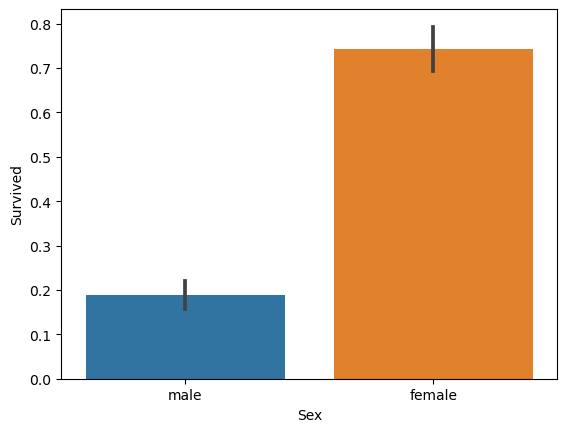

In [25]:
sns.barplot(x="Sex",y="Survived",data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

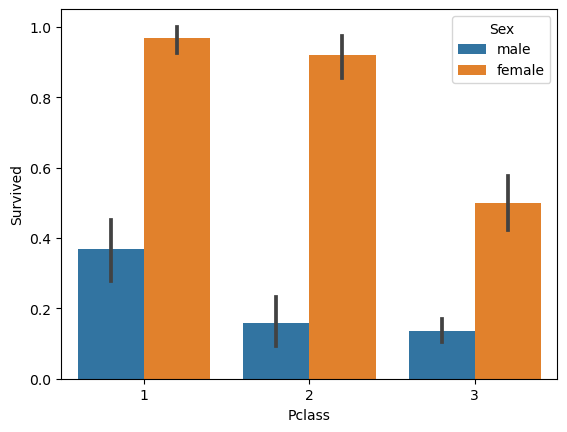

In [26]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic_df)

In [27]:
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lamda 식에 사용
def get_category(age):
    cat=""
    if age <= 1 : cat ="Unknown"
    elif age <=5 : cat = "Baby"
    elif age <=12 : cat = "Child"
    elif age <=18 : cat = "Teenager"
    elif age <=25 : cat = "Student"
    elif age <=35 : cat = "Young Adult"
    elif age <=60 : cat = "Adult"
    else : cat = "Elderly"
    
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

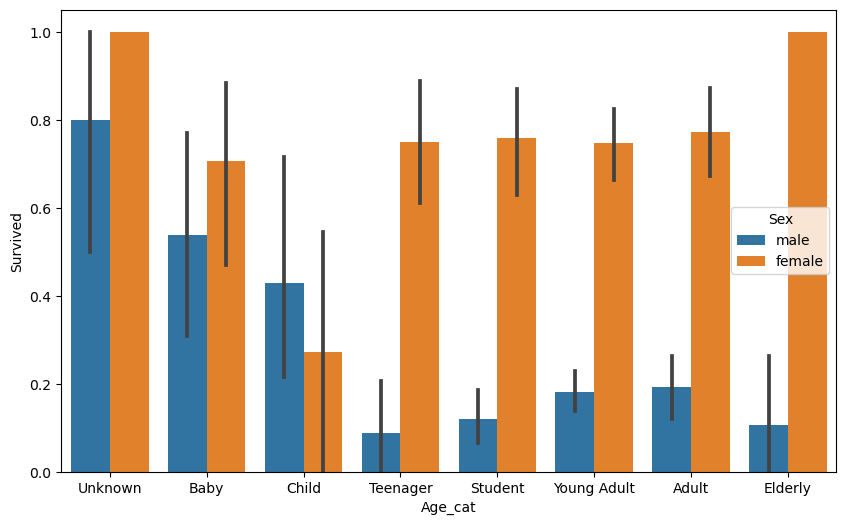

In [29]:
#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
#get_category(x)는 입력값으로 "Age"칼럼 값을 받아서 해당하는 cat 변환

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x: get_category(x))
sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)

In [30]:
titanic_df.drop("Age_cat",axis=1, inplace=True)

In [31]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [32]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [48]:
#Null 처리함수 

def fillna(df):
    df["Age"].fillna(df["Age"].mean(),inplace=True)
    df["Cabin"].fillna("N",inplace=True)
    df["Embarked"].fillna("N",inplace=True)
    df["Fare"].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId","Name","Ticket"],axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [49]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv("/Users/ijiseon/Desktop/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived",axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:4f}".format(iter_count,accuracy))
        
        mean_score= np.mean(scores)
        print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.754190
평균 정확도: 0.7542
교차 검증 1 정확도: 0.780899
평균 정확도: 0.7675
교차 검증 2 정확도: 0.786517
평균 정확도: 0.7739
교차 검증 3 정확도: 0.769663
평균 정확도: 0.7728
교차 검증 4 정확도: 0.820225
평균 정확도: 0.7823


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[2,3,5,10], "min_samples_split":[2,3,5], "min_samples_leaf":[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring= "accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print("GirdSearchCV 최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy))

GirdSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
